<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
df['ConvertedComp'].isnull().sum()

816

In [5]:
print(df['ConvertedComp'].value_counts().to_frame())

           ConvertedComp
2000000.0            138
1000000.0            105
100000.0              99
150000.0              92
120000.0              86
...                  ...
79183.0                1
20475.0                1
288732.0               1
22056.0                1
19880.0                1

[3515 rows x 1 columns]


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0.5, 1.0, 'Distribution Curve of Salary Converted to USD')

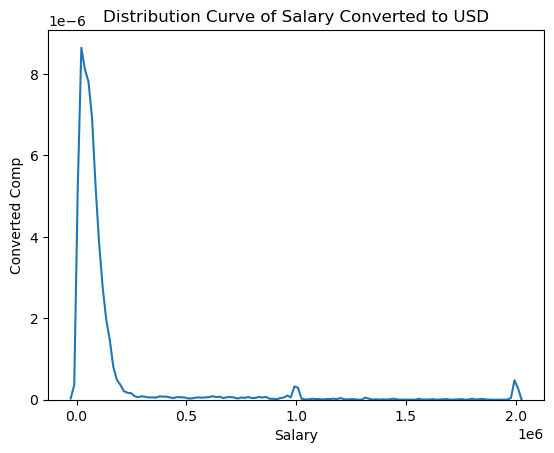

In [77]:
# your code goes here
import seaborn as sns
sns.distplot(df['ConvertedComp'], hist=False, kde=True)
plt.ylabel('Converted Comp')
plt.xlabel('Salary')
plt.title('Distribution Curve of Salary Converted to USD')

Plot the histogram for the column `ConvertedComp`.


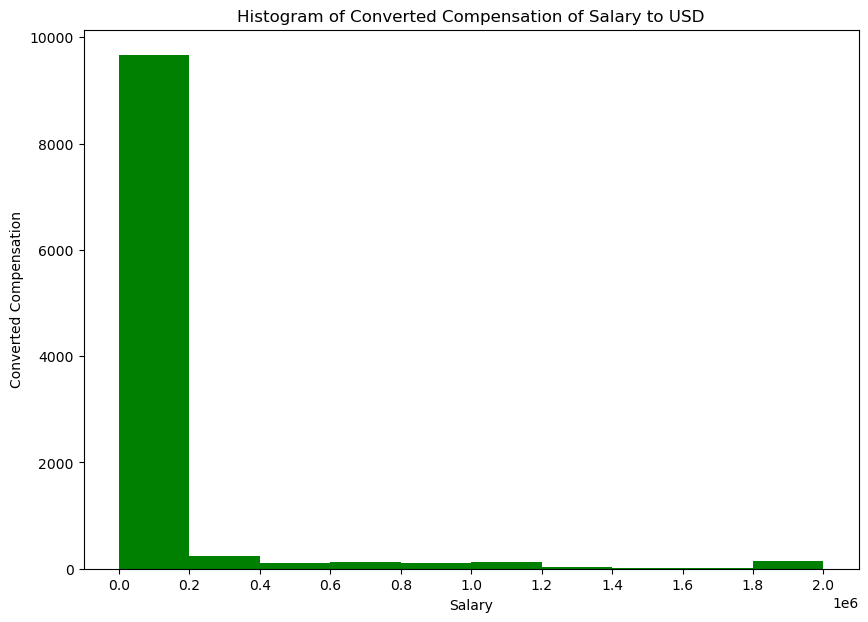

In [25]:
# your code goes here

count, bin_edges=np.histogram(df['ConvertedComp'].dropna())
df['ConvertedComp'].plot(kind='hist', figsize=(10,7), xticks=bin_edges, color='green')
plt.title('Histogram of Converted Compensation of Salary to USD')
plt.ylabel('Converted Compensation')
plt.xlabel('Salary')
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df_ConvComp=df['ConvertedComp'].median()
print('ConvertedComp median is:', df_ConvComp)

ConvertedComp median is: 57745.0


How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [31]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print('The median ConvertedComp of women is:', df_woman['ConvertedComp'].median())

The median ConvertedComp of women is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [35]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


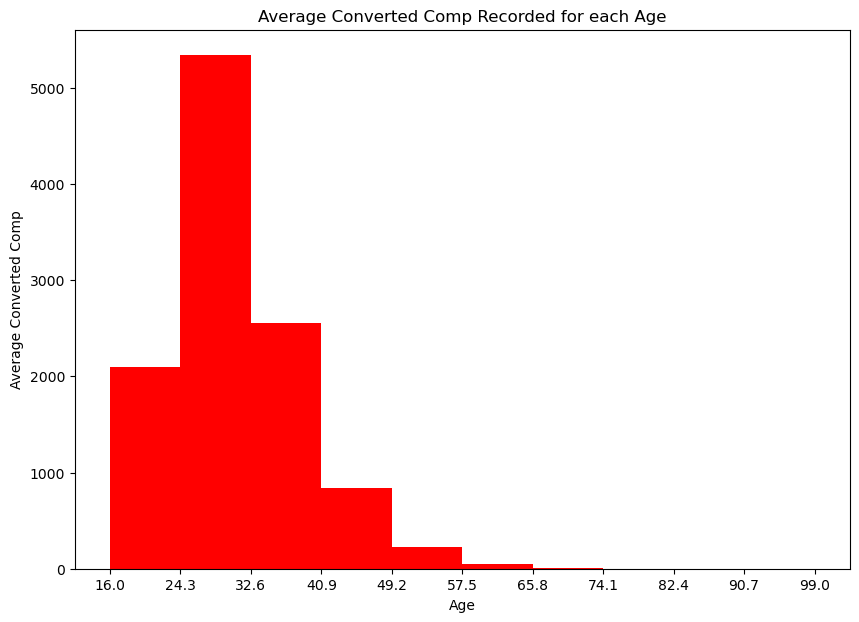

In [57]:
# your code goes here
count, bin_edges=np.histogram(df['Age'].dropna())
df['Age'].plot(kind='hist', figsize=(10,7), xticks=bin_edges, color='red')
plt.title('Average Converted Comp Recorded for each Age')
plt.ylabel('Average Converted Comp')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


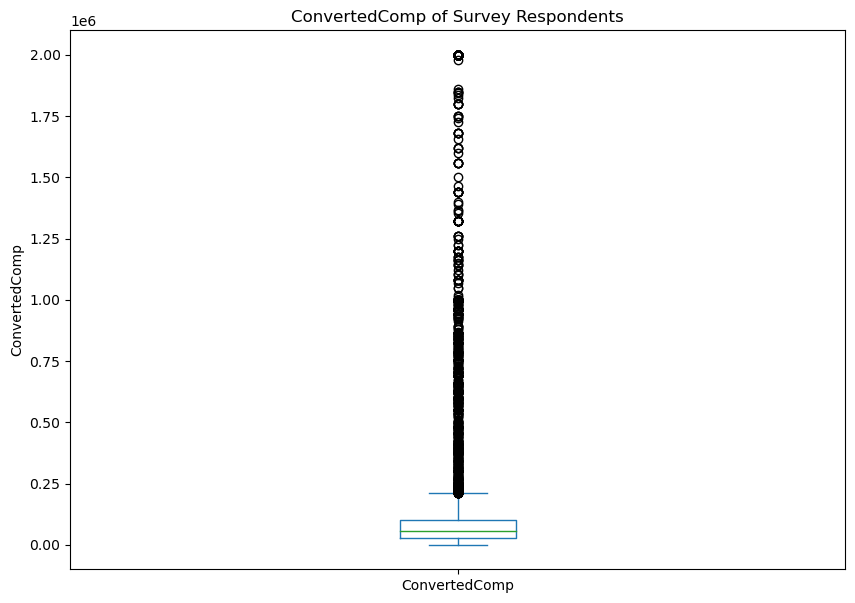

In [38]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,7))
plt.title('ConvertedComp of Survey Respondents')
plt.ylabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [44]:
# your code goes here
df['ConvertedComp'].dropna(axis=0, inplace=True)
Q1, Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3-Q1
print('The Inter Quartile Range for ConvertedComp is:', IQR)

The Inter Quartile Range for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [46]:
# your code goes here
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)
print('The upper bound is:', upper)
print('The lower bound is:', lower)

The upper bound is: 209698.0
The lower bound is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [57]:
# your code goes here
(df['ConvertedComp']<lower).sum() | (df['ConvertedComp']>upper).sum()
print('There are', ((df['ConvertedComp']<lower).sum()|(df['ConvertedComp']>upper).sum()), 'outliers in the ConvertedComp column')

There are 879 outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [78]:
# your code goes here
df_removed_outlier=df['ConvertedComp'][~((df['ConvertedComp']<lower)|
                                         (df['ConvertedComp']>upper))]

In [83]:
# your code goes here
print('The number of outliers remaining in the ConvertedComp:', df_removed_outlier)

The number of outliers remaining in the ConvertedComp: 0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 10519, dtype: float64


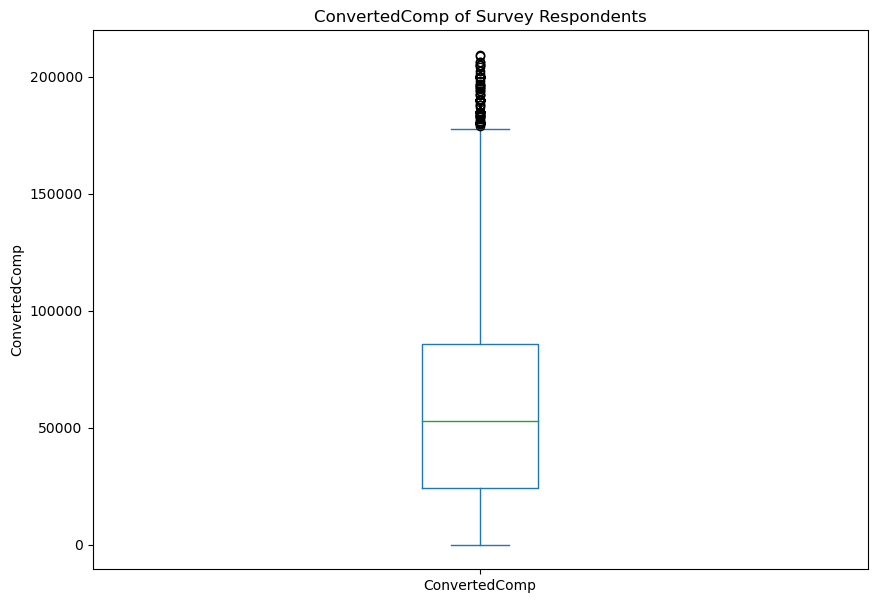

In [85]:
# your code goes here
df_removed_outlier.plot(kind='box', figsize=(10,7))
plt.title('ConvertedComp of Survey Respondents')
plt.ylabel('ConvertedComp')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [63]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
